# Logistic Regression and Multinomial Naive Bayes

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix



In [185]:
# Loading dataset
df = pd.read_csv("game_details_with_counts.csv")

# Ensuring 'cult_classic' is binary (1 for cult classic, 0 for not)
# Cult classic if 'average_rating' > 8 and 'users_rated' < 5000
df['cult_classic'] = (df['average_rating'] > 8) & (df['users_rated'] < 5000)

# Selecting features and target
X = df[['weight', 'category_count', 'mechanic_count', 'min_players', 'max_players', 'min_playtime', 'max_playtime', 'users_rated', 'average_rating']]  # Features for classification
y = df['cult_classic']  # Target label

## Model Setup

In [186]:
# Splitting the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying log transformation to ensure positive values for MultinomialNB and scaling for LogisticRegression
log_transformer = FunctionTransformer(func=lambda x: np.log1p(x), validate=False)
X_train_log = log_transformer.fit_transform(X_train)
X_test_log = log_transformer.transform(X_test)


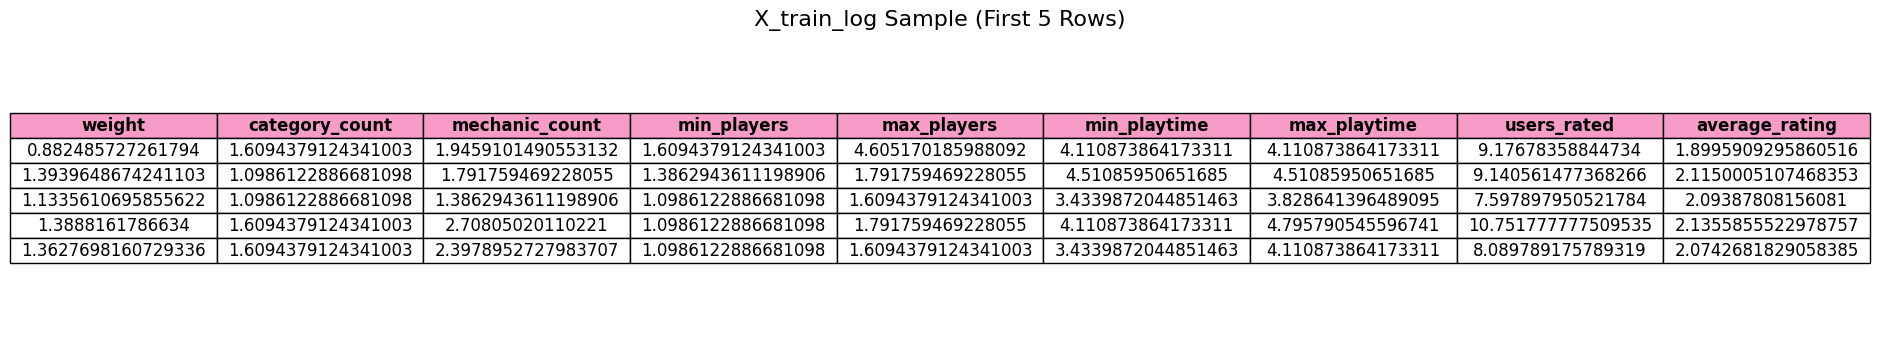

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Display the first five rows of X_train_log
X_train_log_sample = pd.DataFrame(X_train_log, columns=X.columns).head()

# Plotting the data in a table format and saving it as an image
plt.figure(figsize=(16, 4))
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=X_train_log_sample.values, 
                  colLabels=X_train_log_sample.columns, 
                  cellLoc='center', 
                  loc='center')

# Customize the header row color
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f79cc7') 
    else:
        cell.set_fontsize(12)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)
plt.title("X_train_log Sample (First 5 Rows)", fontsize=16)

# Save the plot as an image
plt.savefig("X_train_log_sample.png", dpi=300)
plt.show()





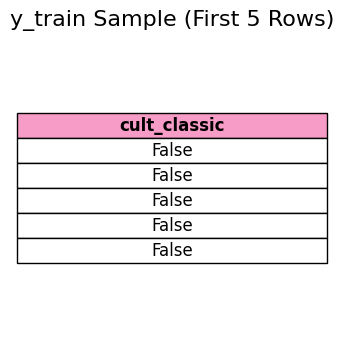

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Display the first five rows of y_train
y_train_sample = pd.DataFrame(y_train).head()

# Plotting the data in a table format and saving it as an image
plt.figure(figsize=(4, 4))
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=y_train_sample.values, 
                  colLabels=y_train_sample.columns, 
                  cellLoc='center', 
                  loc='center')

# Customize the header row color
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f79cc7')  
    else:
        cell.set_fontsize(12)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
plt.title("y_train Sample (First 5 Rows)", fontsize = 16)

# Save the plot as an image
plt.savefig("y_train_sample.png", dpi=300)
plt.show()


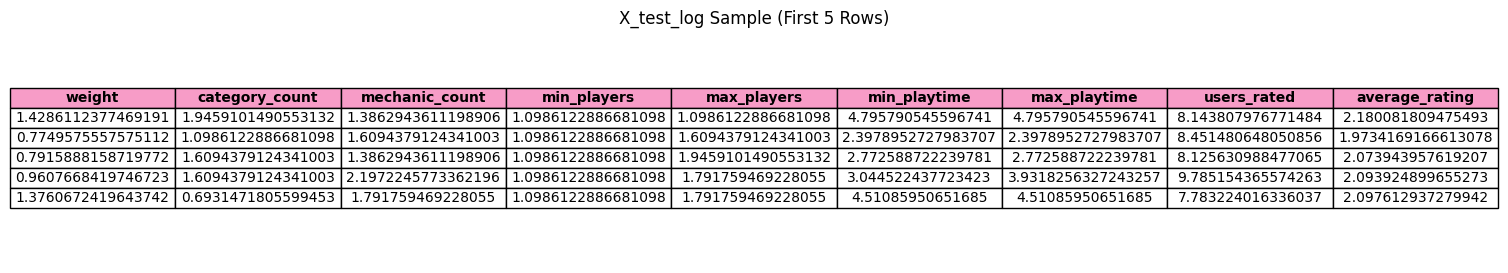

In [189]:
# Display the first five rows of testing data after log transformation
testing_data_sample = pd.DataFrame(X_test_log, columns=X.columns).head(5)

# Plotting the data in a table format and saving it as an image
plt.figure(figsize=(16, 3))
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=testing_data_sample.values, 
                  colLabels=testing_data_sample.columns, 
                  cellLoc='center', 
                  loc='center')
# Customize the header row color
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_fontsize(10)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f79cc7')  
    else:
        cell.set_fontsize(10)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("X_test_log Sample (First 5 Rows)")

# Save the plot as an image
plt.savefig('testing_data_sample.png')
plt.show()


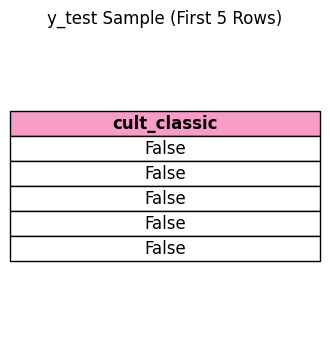

In [ ]:
# Display the first five rows of y_test
y_test_sample = pd.DataFrame(y_test).head()

# Plotting the data in a table format and saving it as an image
plt.figure(figsize=(4, 4))
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=y_test_sample.values, 
                  colLabels=y_test_sample.columns, 
                  cellLoc='center', 
                  loc='center')

# Customize the header row color
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f79cc7') 
    else:
        cell.set_fontsize(12)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
plt.title("y_test Sample (First 5 Rows)")

# Save the plot as an image
plt.savefig("y_test_sample.png", dpi=300)
plt.show()

## Model Implementation & Eval

In [191]:
# Logistic Regression 
logreg = LogisticRegression()
logreg.fit(X_train_log, y_train)
y_pred_logreg = logreg.predict(X_test_log)

# Multinomial Naïve Bayes
nb = MultinomialNB()
nb.fit(X_train_log, y_train)
y_pred_nb = nb.predict(X_test_log)




In [192]:
# Evaluating the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9377777777777778

Logistic Regression Confusion Matrix:
[[834   4]
 [ 52  10]]


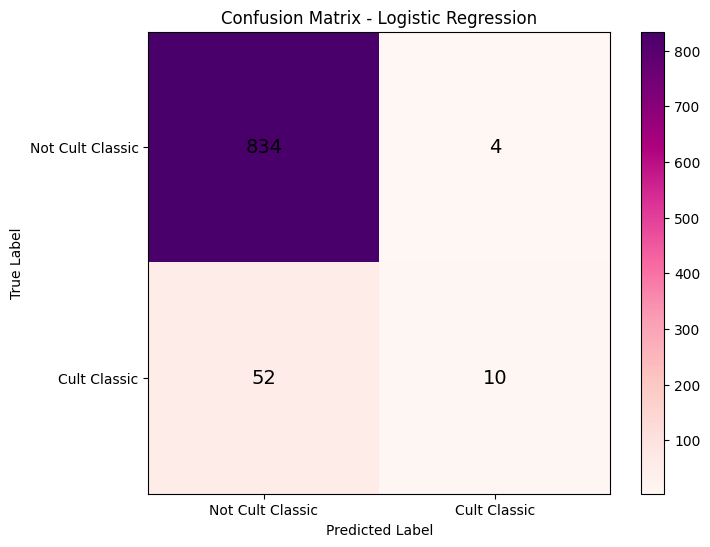

Accuracy of Logistic Regression: 0.9377777777777778


In [193]:
# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_logreg, cmap='RdPu', interpolation='nearest')
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)  # Two classes: 0 (not_cult_classic) and 1 (cult_classic)
plt.xticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.yticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotating the confusion matrix with values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_logreg[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.savefig('confusion_matrix_logistic_regression.png')
plt.show()
# Print the accuracy
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred_logreg))


In [194]:
# Evaluating the models
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaïve Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.9311111111111111

Naïve Bayes Confusion Matrix:
[[838   0]
 [ 62   0]]


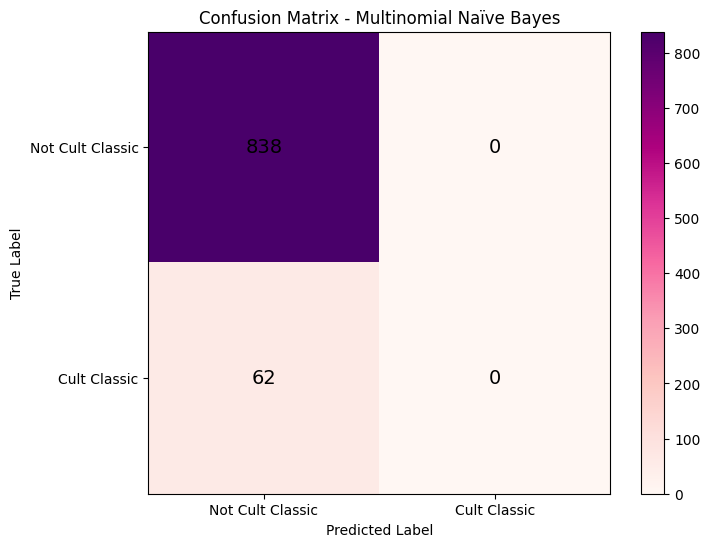

Accuracy of Multinomial Naïve Bayes: 0.9311111111111111


In [195]:
# Confusion Matrix for Multinomial Naïve Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_nb, cmap='RdPu', interpolation='nearest')
plt.title('Confusion Matrix - Multinomial Naïve Bayes')
plt.colorbar()
plt.xticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.yticks(tick_marks, ['Not Cult Classic', 'Cult Classic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotating the confusion matrix with values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_nb[i, j]), horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.savefig('confusion_matrix_multinomial_nb.png')
plt.show()

# Print the accuracy
print("Accuracy of Multinomial Naïve Bayes:", accuracy_score(y_test, y_pred_nb))